In [98]:
%matplotlib inline
### Standard imports
import uproot, uproot3, h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepIO as hio
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
### Settings
hf.DefaultSetup()
hf.DefaultSetup()

In [139]:
fname = '/Users/sdporzio/Data/Mine/raw_2021_04_04_02_59_30_CESTevd.root'
branch = 'tracks'

of = uproot3.open(fname)[branch].pandas.df(['*'],flatten=False,namedecode='utf-8')
df = uproot.open(fname)[branch].arrays(library='pd')
print(f'Available branches: {uproot3.open(fname).allkeys()}')
print(f'DF {branch} multiplicity: {len(df):.0f}')

df0 = of.query('eventID==5')
df1 = df[0].query('eventID==5')
df2 = df[1].query('eventID==5')

Available branches: [b'tracks;1']
DF tracks multiplicity: 2


In [141]:
fname = '/Users/sdporzio/Data/Mine/raw_2021_04_04_02_59_30_CESTevd.h5'
branch = 'hits'

h5 = h5py.File(fname,'r')
print(f'Available branches: {[t for t in h5.keys()]}')

hf = h5[branch]
print(f'Available keys in {branch}: {[t for t in hf.dtype.names]}')

Available branches: ['events', 'ext_trigs', 'hits', 'info', 'tracks']
Available keys in hits: ['hid', 'px', 'py', 'ts', 'q', 'iochannel', 'iogroup', 'chipid', 'channelid', 'geom', 'event_ref', 'q_raw']


In [181]:
h5['events'].dtype.names

('evid',
 'track_ref',
 'hit_ref',
 'nhit',
 'q',
 'ts_start',
 'ts_end',
 'ntracks',
 'ext_trig_ref',
 'n_ext_trigs',
 'unix_ts',
 'q_raw')

In [190]:
evid = 10

hits = h5['hits']
sel_hits = []

for hit in tqdm(hits):
    event_id_ref = hit['event_ref']
    event_id = h5['events'][event_id_ref]['evid'][0]
    if event_id == evid:
        sel_hits.append(hit)

  0%|          | 0/28845 [00:00<?, ?it/s]

KeyboardInterrupt: 

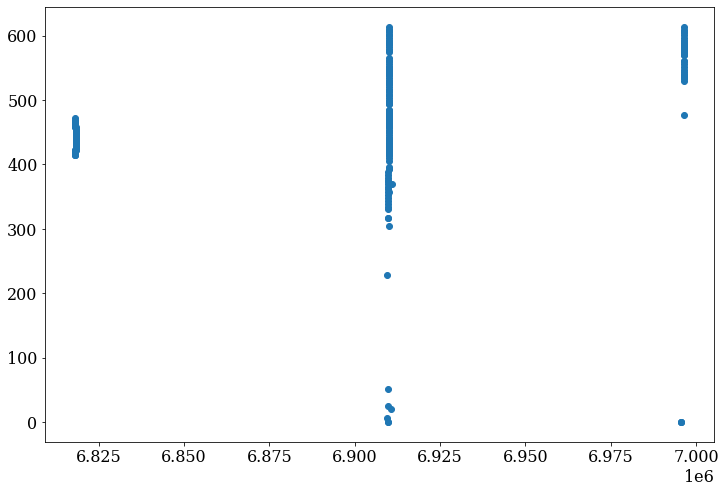

In [228]:
step = 103
width = 200

sel_hits = hits[step*width:(step+1)*width]

pxs = [hit['px'] for hit in sel_hits]
pys = [hit['py'] for hit in sel_hits]
tss = [hit['ts'] for hit in sel_hits]

plt.scatter(tss,pys)

In [209]:
tss

[19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19]